# Car Price Prediction

## Understang the Problem

#### The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

## Data Extraction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
car_data = pd.read_csv("car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

## Data Cleaning

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
car_data.duplicated().sum()

2

In [7]:
car_data[car_data.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [8]:
car_data = car_data.drop_duplicates()
car_data.duplicated().sum()

0

In [9]:
print("No. of Row is : ", car_data.shape[0])
print("No. of Column is : ", car_data.shape[1])

No. of Row is :  299
No. of Column is :  9


In [10]:
car_data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
categorical_column = car_data.select_dtypes(include=['object']).columns
print(categorical_column)

Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')


In [12]:
numerical_column = car_data.select_dtypes(exclude=['object']).columns
print(numerical_column)

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner'], dtype='object')


In [13]:
print(car_data.Present_Price.describe(percentiles = [0.25, 0.50, 0.75, 0.85, 0.90, 1]))

count    299.000000
mean       7.541037
std        8.566332
min        0.320000
25%        1.200000
50%        6.100000
75%        9.840000
85%       13.600000
90%       14.790000
100%      92.600000
max       92.600000
Name: Present_Price, dtype: float64


In [14]:
print(car_data.Selling_Price.describe(percentiles = [0.25, 0.50, 0.75, 0.85, 0.90, 1]))

count    299.000000
mean       4.589632
std        4.984240
min        0.100000
25%        0.850000
50%        3.510000
75%        6.000000
85%        8.005000
90%        9.300000
100%      35.000000
max       35.000000
Name: Selling_Price, dtype: float64


## Exploratory Data Analysis

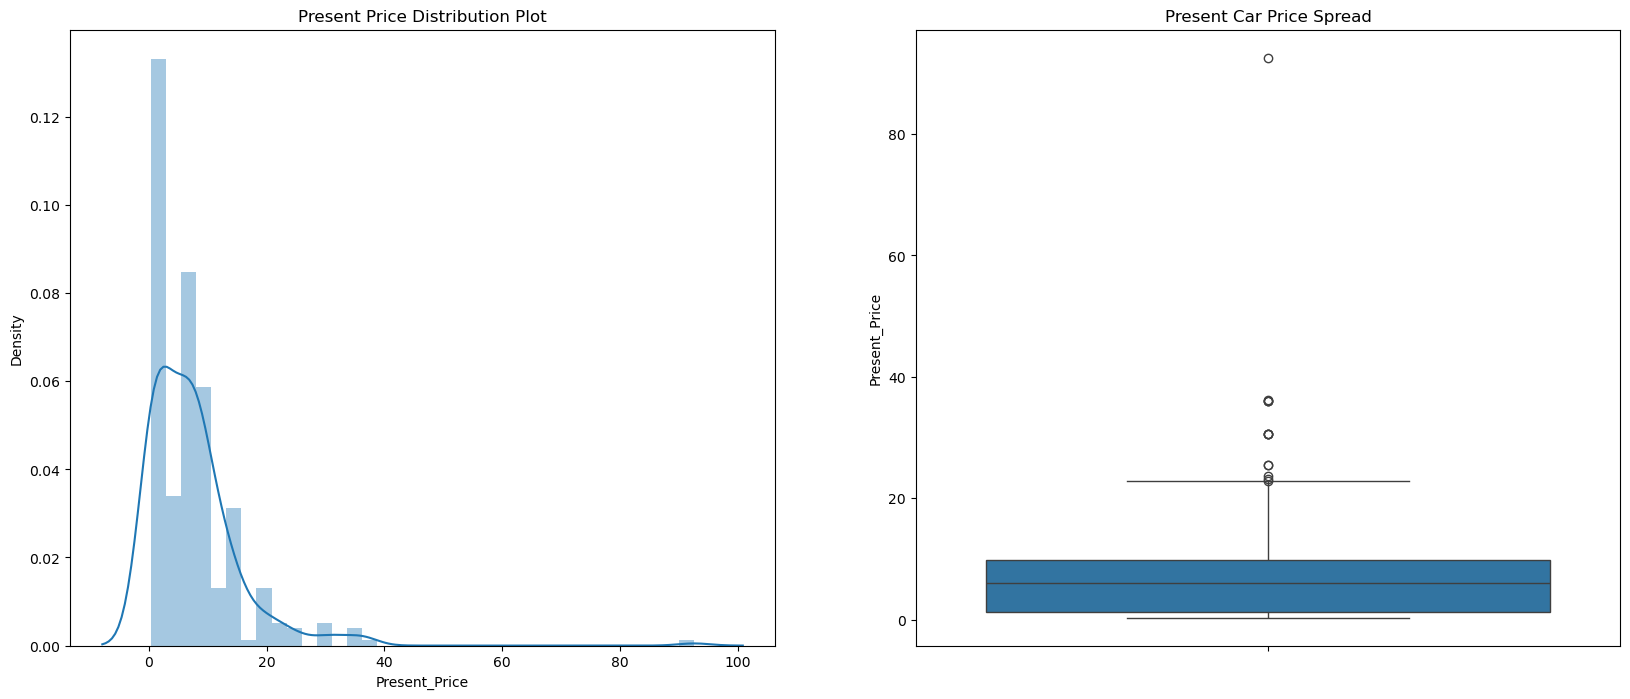

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Present Price Distribution Plot')
sns.distplot(car_data.Present_Price)

plt.subplot(1,2,2)
plt.title('Present Car Price Spread')
sns.boxplot(y = car_data.Present_Price)

plt.show()    

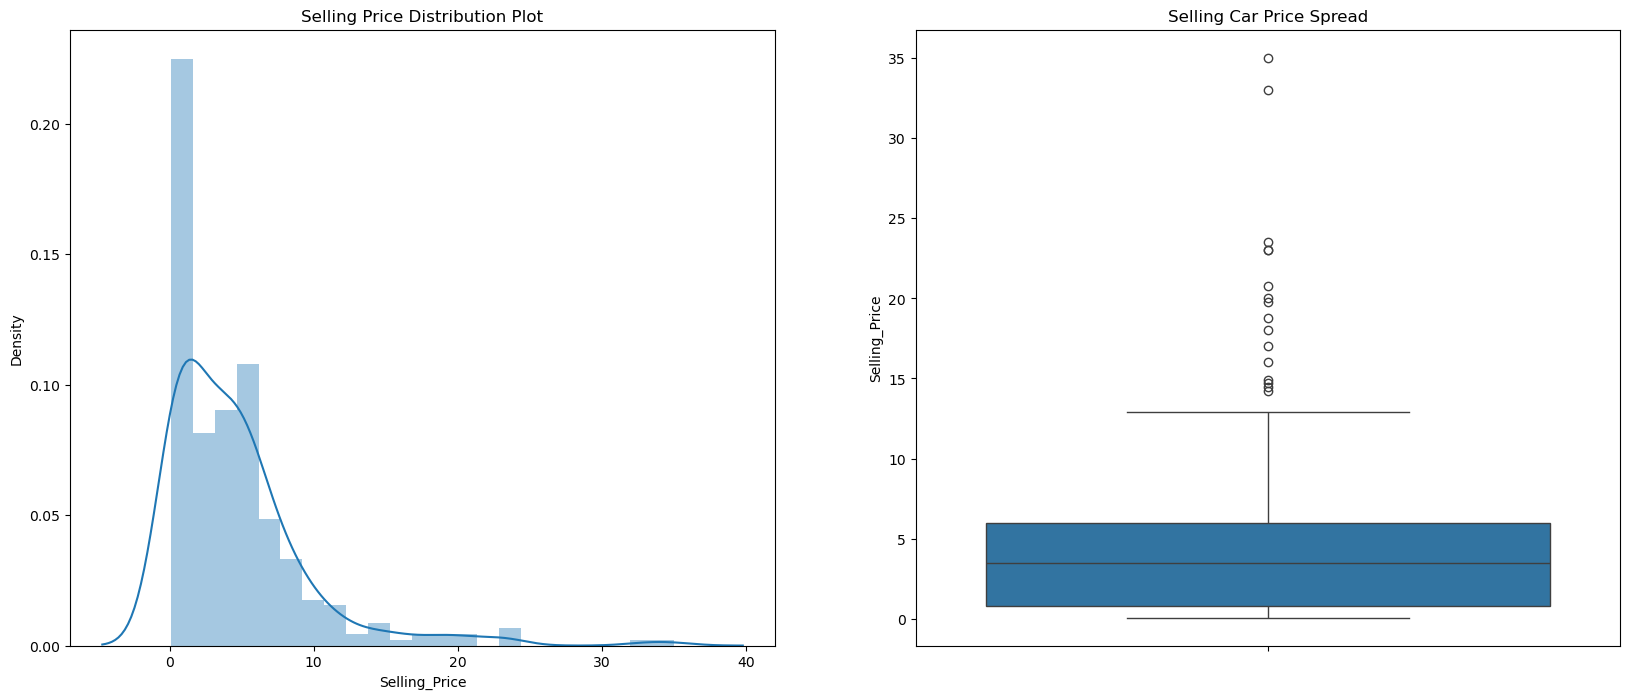

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Selling Price Distribution Plot')
sns.distplot(car_data.Selling_Price)

plt.subplot(1,2,2)
plt.title('Selling Car Price Spread')
sns.boxplot(y = car_data.Selling_Price)

plt.show() 

[Text(0.5, 0, 'Car Names'), Text(0, 0.5, 'Frequency of car names')]

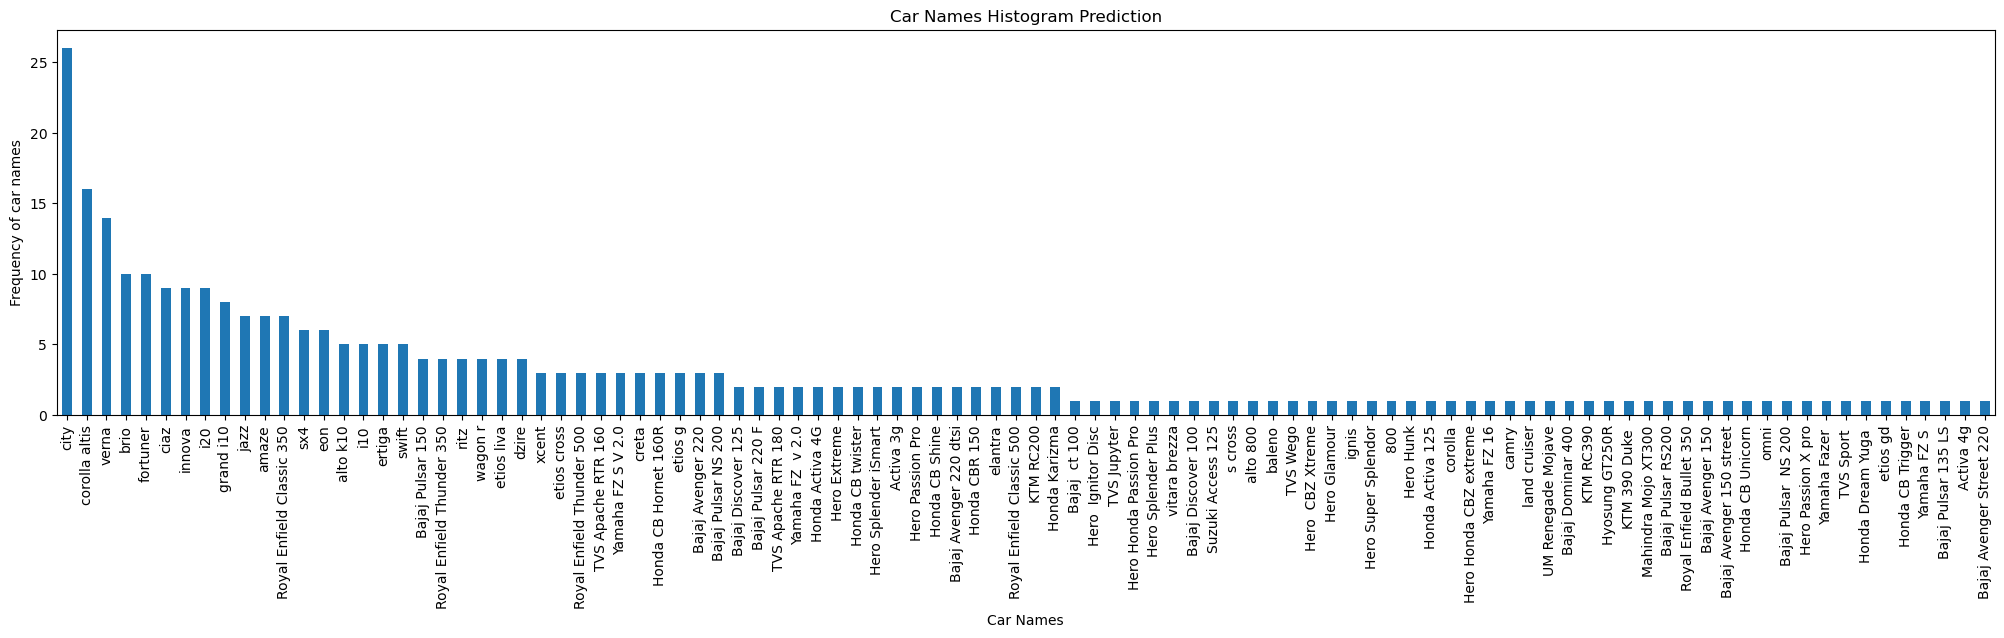

In [17]:
plt.figure(figsize = (25, 5))
plt1 = car_data.Car_Name.value_counts().plot(kind = 'bar')
plt.title('Car Names Histogram Prediction')
plt1.set(xlabel = 'Car Names', ylabel = 'Frequency of car names')

[Text(0.5, 0, 'Fuel Type'), Text(0, 0.5, 'Frequency of Fuel Type\t')]

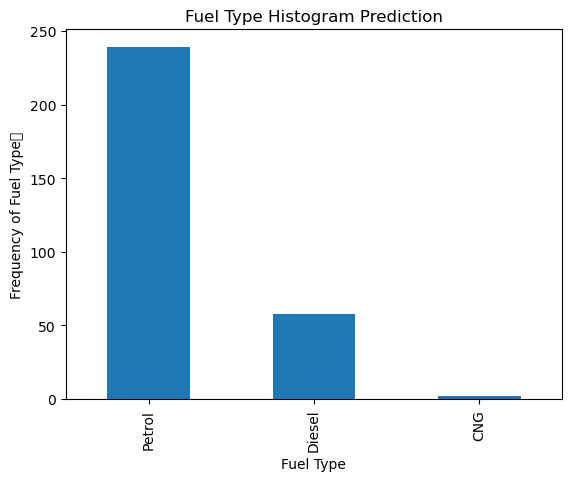

In [18]:
plt1 = car_data.Fuel_Type.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram Prediction')
plt1.set(xlabel = 'Fuel Type', ylabel = 'Frequency of Fuel Type	')

[Text(0.5, 0, 'Year'), Text(0, 0.5, 'Frequency of Year Type\t')]

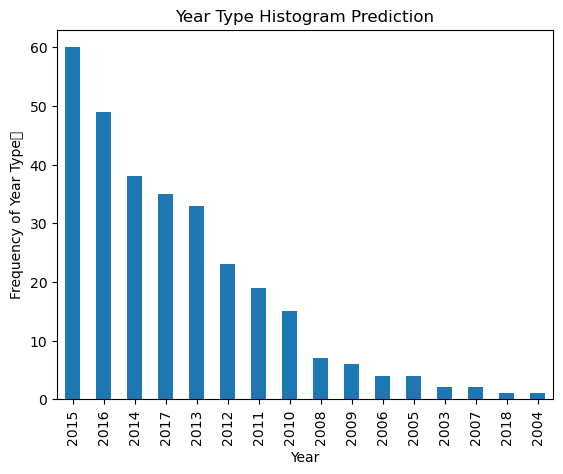

In [19]:
plt1 = car_data.Year.value_counts().plot(kind = 'bar')
plt.title('Year Type Histogram Prediction')
plt1.set(xlabel = 'Year', ylabel = 'Frequency of Year Type	')

[Text(0.5, 0, 'Selling type'), Text(0, 0.5, 'Frequency of Selling type')]

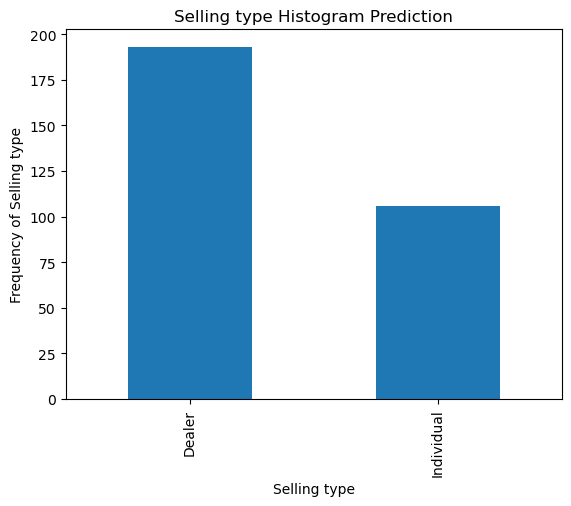

In [20]:
plt1 = car_data.Selling_type.value_counts().plot(kind = 'bar')
plt.title('Selling type Histogram Prediction')
plt1.set(xlabel = 'Selling type', ylabel = 'Frequency of Selling type')

[Text(0.5, 0, 'Transmission'), Text(0, 0.5, 'Frequency of Transmission')]

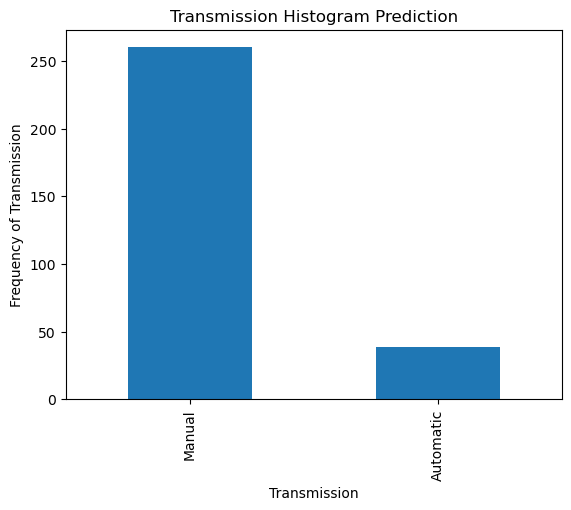

In [21]:
plt1 = car_data.Transmission.value_counts().plot(kind = 'bar')
plt.title('Transmission Histogram Prediction')
plt1.set(xlabel = 'Transmission', ylabel = 'Frequency of Transmission')

[Text(0.5, 0, 'Owner'), Text(0, 0.5, 'Frequency of Owner Type')]

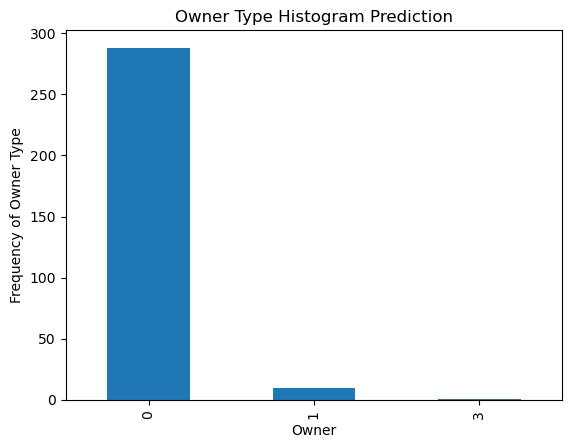

In [22]:
plt1 = car_data.Owner.value_counts().plot(kind = 'bar')
plt.title('Owner Type Histogram Prediction')
plt1.set(xlabel = 'Owner', ylabel = 'Frequency of Owner Type')

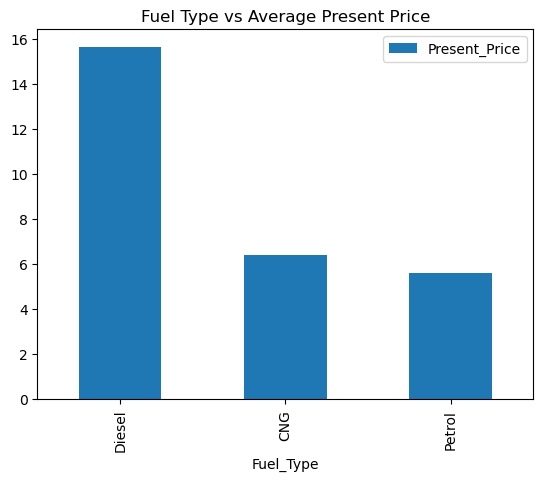

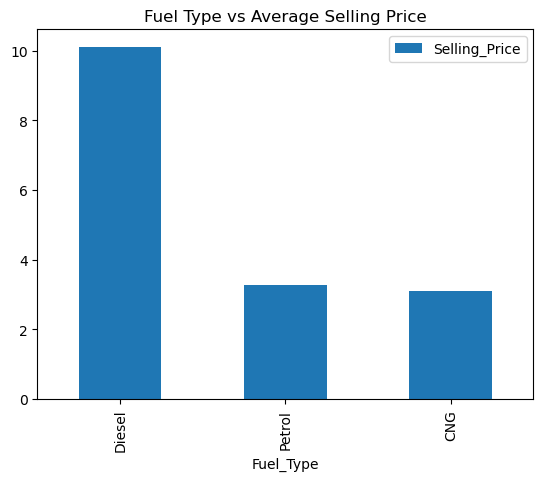

In [23]:
df = pd.DataFrame(car_data.groupby(['Fuel_Type'])['Present_Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Present Price')
plt.show()


df = pd.DataFrame(car_data.groupby(['Fuel_Type'])['Selling_Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Selling Price')
plt.show()

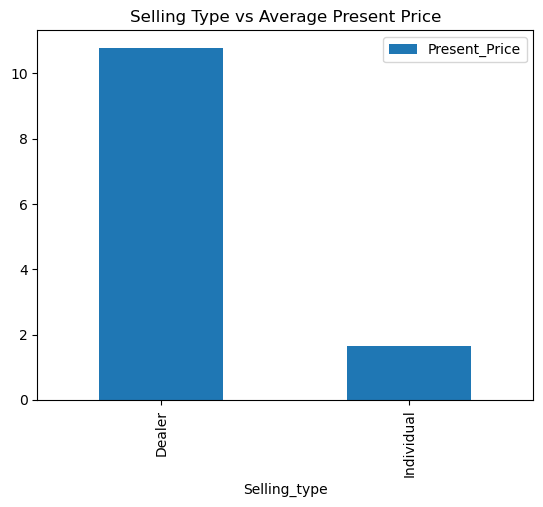

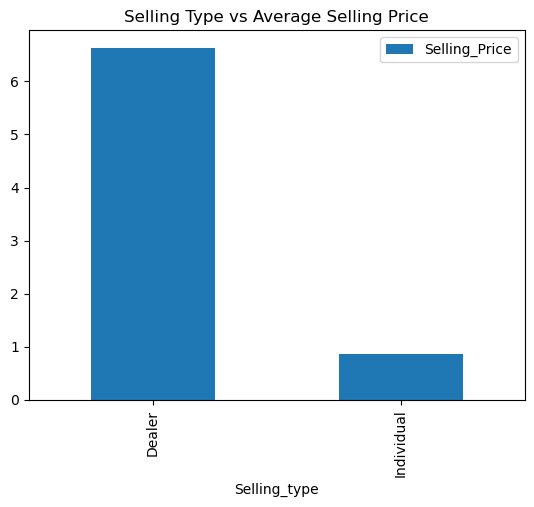

In [24]:
df = pd.DataFrame(car_data.groupby(['Selling_type'])['Present_Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Selling Type vs Average Present Price')
plt.show()


df = pd.DataFrame(car_data.groupby(['Selling_type'])['Selling_Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Selling Type vs Average Selling Price')
plt.show()

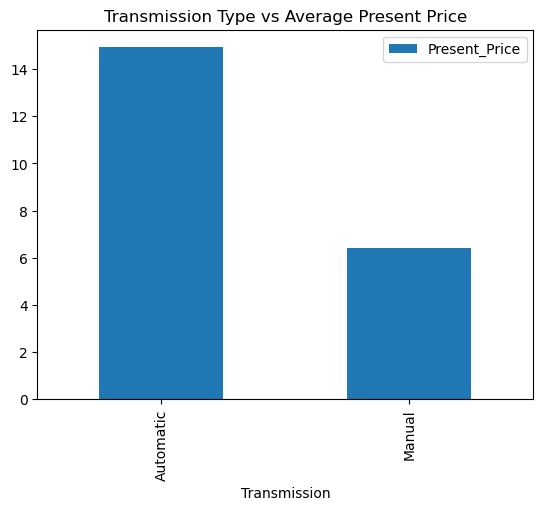

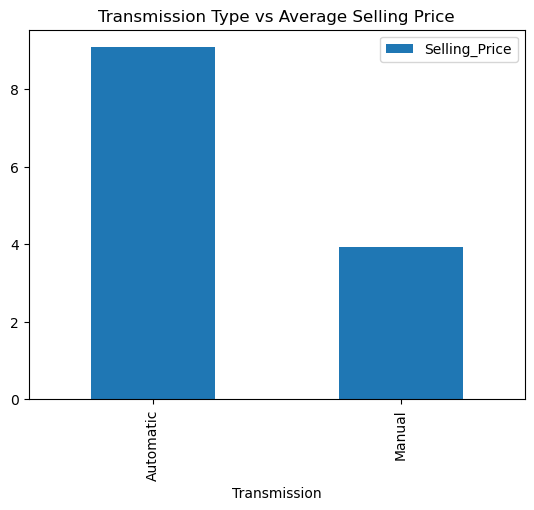

In [25]:
df = pd.DataFrame(car_data.groupby(['Transmission'])['Present_Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Transmission Type vs Average Present Price')
plt.show()


df = pd.DataFrame(car_data.groupby(['Transmission'])['Selling_Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Transmission Type vs Average Selling Price')
plt.show()

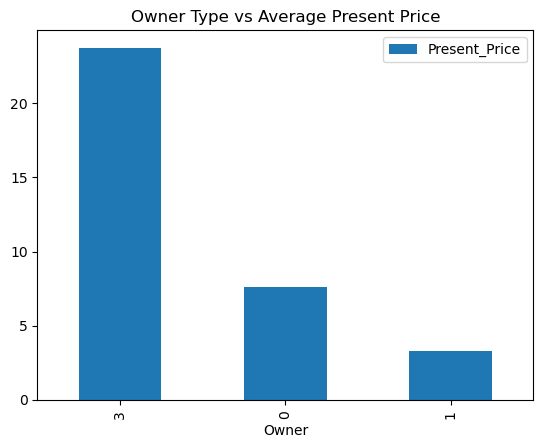

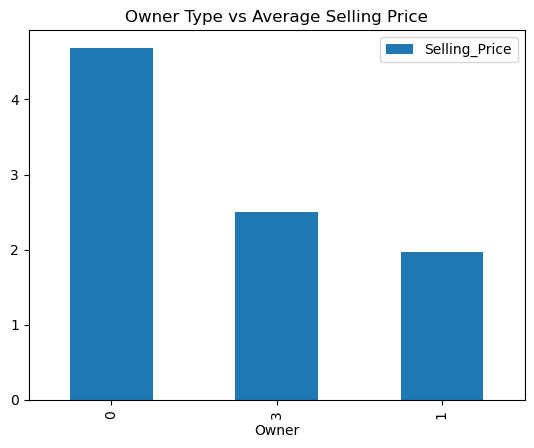

In [26]:
df = pd.DataFrame(car_data.groupby(['Owner'])['Present_Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Owner Type vs Average Present Price')
plt.show()


df = pd.DataFrame(car_data.groupby(['Owner'])['Selling_Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Owner Type vs Average Selling Price')
plt.show()

<Axes: title={'center': 'Heatmap of Car Price Prediction'}>

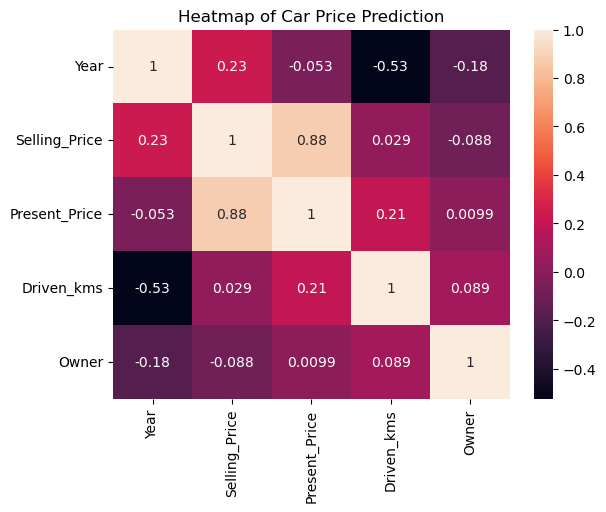

In [27]:
plt.title("Heatmap of Car Price Prediction")
sns.heatmap(car_data[numerical_column].corr(), annot = True)

## Feature Selection

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [29]:
X = car_data[numerical_column].drop(columns = 'Selling_Price', axis = 1)
Y = car_data['Selling_Price']

In [30]:
X.head()

,Year,Present_Price,Driven_kms,Owner
0,2014,5.59,27000,0
1,2013,9.54,43000,0
2,2017,9.85,6900,0
3,2011,4.15,5200,0
4,2014,6.87,42450,0


In [31]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 20)

## Incorporating Machine Learning Algorithms

In [33]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [34]:
prediction = model.predict(X_test)
prediction

array([ 8.45469147,  4.79297855,  6.51465138,  1.47091494,  2.22085359,
        7.87038948,  2.59285573,  4.78575966, 18.68893766,  2.69064627,
       -1.53048989,  2.50609236,  2.02021864,  4.74591273,  5.22664122,
        8.0447954 ,  5.50743959,  0.23798359,  7.67265621,  0.84986716,
        3.9522634 ,  9.37058271,  8.4317453 , 19.03624058,  8.12651364,
        4.49451512,  5.55441615,  6.01742041,  1.27876735,  5.17053054,
        2.43831091,  2.44426397,  2.9040733 ,  8.92670321,  4.96205293,
        4.23906659,  6.27732868,  5.62578495,  2.12687936,  6.70876617,
        2.02609353,  0.91132526,  5.24870417,  5.89608207,  0.1302323 ,
        3.05881682,  3.59997856,  9.81196414,  4.19150305, 19.90418902,
        2.89053052,  7.4981965 ,  3.14969188,  1.78343797,  0.6353167 ,
        3.72717161,  6.06723624,  2.19537858,  6.29454567,  1.00133723,
        4.20445112,  4.11671397,  7.54704235,  5.17078569,  2.8002313 ,
        4.97120386,  1.34116078, 10.63506189,  4.18459034, 14.61

In [35]:
model.intercept_

-821.0699383168457

In [36]:
model.coef_

array([4.08147284e-01, 4.89353548e-01, 1.96272165e-06, 3.99470377e-01])

## Testing The Model

In [37]:
accuracy_score = model.score(X_test, Y_test)*100
print(f"Accuracy of Sales Prediction Model is : {accuracy_score}")

Accuracy of Sales Prediction Model is : 80.6759568266635


In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [39]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
rfe = RFE(lr)
rfe = rfe.fit(X_train, Y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('Present_Price', True, 1),
 ('Driven_kms', False, 3),
 ('Owner', False, 2)]

In [41]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,Year,Present_Price
122,2016,1.17
60,2013,18.61
110,2016,1.78
126,2017,0.95
114,2015,1.47


In [42]:
def build_model(X,y):
    X = sm.add_constant(X)
    lm = sm.OLS(y,X).fit()
    print(lm.summary())
    return X

In [43]:
X_train = build_model(X_train_rfe, Y_train)

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     622.1
Date:                Wed, 21 Aug 2024   Prob (F-statistic):           5.06e-88
Time:                        20:55:09   Log-Likelihood:                -414.22
No. Observations:                 209   AIC:                             834.4
Df Residuals:                     206   BIC:                             844.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -787.4293     84.962     -9.268

Text(0.5, 0, 'Errors')

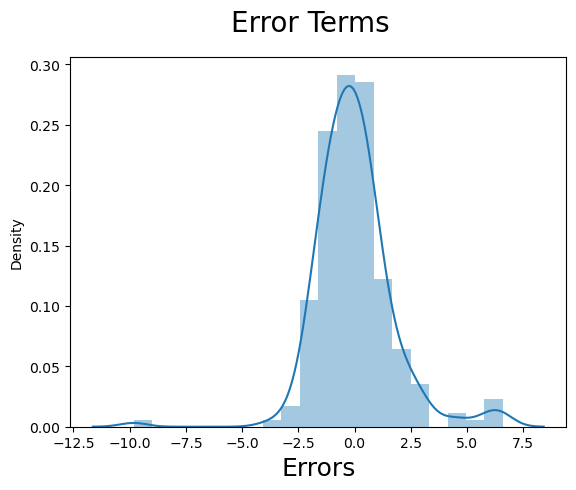

In [44]:
lm = sm.OLS(Y_train, X_train).fit()
Y_train_price = lm.predict(X_train)

fig = plt.figure()
sns.distplot((Y_train - Y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)